### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sofía Hernández Zatarain, Luis Eduardo Sánchez Soto, Cristian Vázquez Plesent.

**Fecha:** 18 de abril del 2023.

**Expediente** : 727151, 734350, 731324.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/sofiahzt/Proyecto

# Proyecto TEMA-2

___
## Desempleo en Estados Unidos.

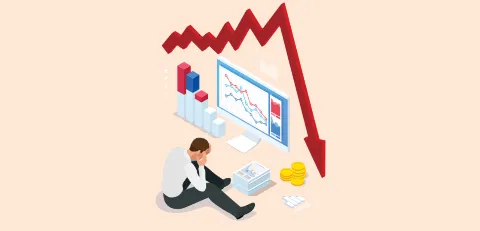

Con este proyecto buscamos analizar el comportamiento de la tasa de desempleo, el PIB, el salario minimo, poblacion e inflación en Estados Unidos a lo largo del tiempo para realizar una proyección de la poblacion desempleada en los siguientes años. 

### 1.2 Objetivos.

**Objetivo general**

Predecir la población desempleada de Estados Unidos durante la siguiente década.

**Objetivos específicos**

* Encontrar la distribución de probabilidad de la población desempleada
* Encontrar la distribución de probabilidad de la tasa de crecimiento del PIB 
* Encontrar la distribución de probabilidad de la tasa de crecimiento de la poblacion
* Encontrar la distribución de probabilidad de la tasa de crecimiento del salario minimo en Estados Unidos
* Encontrar la distribución de probabilidad de la tasa de variacion de la inflacion

### 1.3 Definición del problema.

Considerando que disponemos de un dataset sobre el desempleo en Estados Unidos por estado, haremos una agrupación de los datos en relación a los años establecidos en el frame. Posteriormente obtendrémos las distribuciones de probabilidad de nuestros nodos de interés para así iniciar con las simulaciones. 

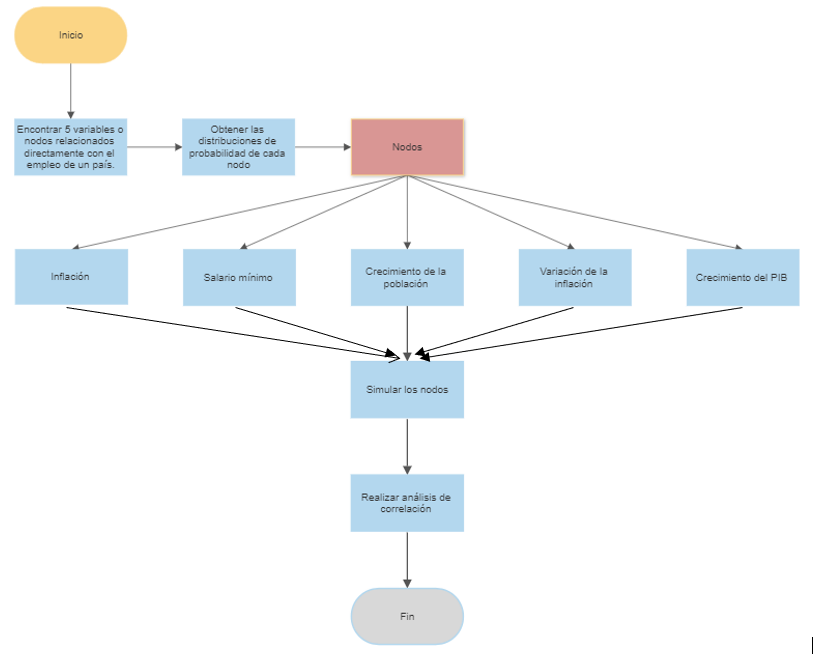

### 1.4 Nodos y variables que se decidieron simular y porqué

* Porcentaje de la fuerza de trabajo desempleada: necesitamos conocer el porcentaje de población desempleada.
* Producto Interno Bruto: indicador del desempeño de la economia, tiene relacion directa con la creacion de nuevos empleos.
* Población en Estados Unidos: si queremos predecir la poblacion desempleada, necesitaremos principalmente predecir la tasa de desempleo y la poblacion desempleada.
* Salario minimo : el salario minimo impacta directamente la demanda de empleos.
* inflacion: importante indicador de la situación economica del pais.  

### 1.5 Definición de hipótesis y supuestos.

**Hipótesis:**

La poblacion de Estados Unidos, el crecimiento de su PIB, crecimiento del salario minimo, la variacion de la inflacion y la tasa desempleada estan directamente relacionadas y pueden usarse pronosticar la poblacion desempleada del pais.

**Supuestos:**

* No sucederán eventos que impacten desproporcionadamente la tasa de desempleo (pandemia, guerras, crisis)

### 1.6 Obtención de bases de datos

https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

In [2]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Unemployment.csv")
data

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,"6,862,585","4,470,272",65.1,"4,330,531",63.1,"139,741",3.1
29888,53,Washington,2022,12,"6,254,253","4,015,286",64.2,"3,832,769",61.3,"182,517",4.5
29889,54,West Virginia,2022,12,"1,434,789","784,323",54.7,"752,464",52.4,"31,859",4.1
29890,55,Wisconsin,2022,12,"4,753,700","3,068,610",64.6,"2,976,670",62.6,"91,940",3.0


In [3]:
data_y = data.groupby('Year').mean().drop(columns="Month")
data_y.head()

,FIPS Code,Percent (%) of State/Area's Population,Percent (%) of Labor Force Employed in State/Area,Percent (%) of Labor Force Unemployed in State/Area
Year,,,,
1976,990.830189,62.489151,58.027830,7.166195
1977,990.830189,63.128302,58.932547,6.678145
1978,990.830189,63.780503,60.141981,5.730503
1979,990.830189,64.247484,60.694811,5.565094
1980,990.830189,64.425000,60.041352,6.843868


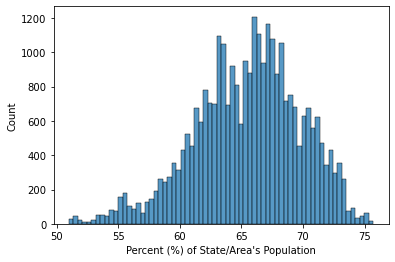

In [4]:
sns.histplot(data["Percent (%) of State/Area's Population"]);

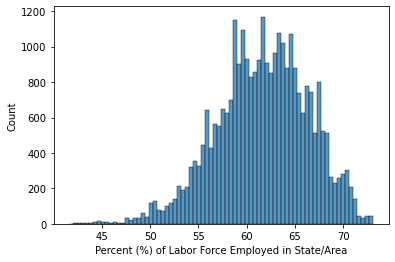

In [5]:
sns.histplot(data["Percent (%) of Labor Force Employed in State/Area"]);

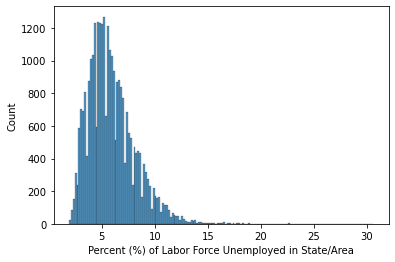

In [6]:
sns.histplot(data["Percent (%) of Labor Force Unemployed in State/Area"]);

In [7]:
pop = pd.read_csv("population_usa.csv")
pop

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,U.S. Global Rank
0,2020,331002651,0.59,1937734,954806,38.3,1.78,36,82.8,273975139,4.25,7794798739,3
1,2019,329064917,0.60,1968652,954806,37.7,1.85,36,82.5,271365914,4.27,7713468100,3
2,2018,327096265,0.62,2011509,954806,37.7,1.85,36,82.2,268786714,4.29,7631091040,3
3,2017,325084756,0.64,2068761,954806,37.7,1.85,36,81.9,266243516,4.31,7547858925,3
4,2016,323015995,0.67,2137685,954806,37.7,1.85,35,81.7,263743312,4.33,7464022049,3
5,2015,320878310,0.76,2373367,992343,37.6,1.88,35,81.4,261287811,4.35,7379797139,3
6,2010,309011475,0.93,2803593,1085751,36.9,2.06,34,80.7,249297076,4.44,6956823603,3
7,2005,294993511,0.93,2656520,1066979,36.1,2.04,32,80.0,235892407,4.51,6541907027,3
8,2000,281710909,1.22,3309433,1771991,35.2,2.00,31,79.1,222927913,4.59,6143493823,3
9,1995,265163745,1.01,2608687,892751,34.0,2.03,29,77.4,205240402,4.62,5744212979,3


In [8]:
pop = pop.drop([1, 2, 3, 4])
pop

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,U.S. Global Rank
0,2020,331002651,0.59,1937734,954806,38.3,1.78,36,82.8,273975139,4.25,7794798739,3
5,2015,320878310,0.76,2373367,992343,37.6,1.88,35,81.4,261287811,4.35,7379797139,3
6,2010,309011475,0.93,2803593,1085751,36.9,2.06,34,80.7,249297076,4.44,6956823603,3
7,2005,294993511,0.93,2656520,1066979,36.1,2.04,32,80.0,235892407,4.51,6541907027,3
8,2000,281710909,1.22,3309433,1771991,35.2,2.00,31,79.1,222927913,4.59,6143493823,3
9,1995,265163745,1.01,2608687,892751,34.0,2.03,29,77.4,205240402,4.62,5744212979,3
10,1990,252120309,0.95,2324097,673371,32.8,1.91,28,75.4,190156233,4.73,5327231061,3
11,1985,240499825,0.94,2204694,676492,31.4,1.80,26,74.6,179400645,4.94,4870921740,3
12,1980,229476354,0.93,2079021,754176,30.0,1.77,25,73.8,169422683,5.15,4458003514,3
13,1975,219081251,0.90,1913582,577869,29.0,2.03,24,73.7,161450209,5.37,4079480606,3


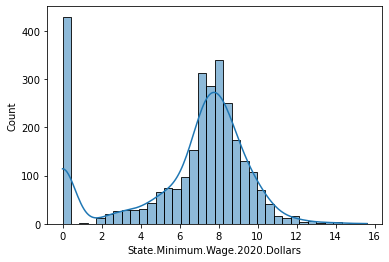

In [4]:
wage = pd.read_csv("Minimum Wage Data.csv",encoding='cp1252')
sns.histplot(wage["State.Minimum.Wage.2020.Dollars"], kde=True);

In [5]:
wage

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>